In [433]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [434]:
# Load the data
# give columns name
df = pd.read_csv('smoking.csv')
print(df.shape)
df.head()

(55692, 27)


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [435]:
# Dorp the columns with miss data
df.replace('?',np.nan, inplace=True)
df = df.dropna()
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [436]:
print(df.shape)

(55692, 27)


In [437]:
df = df.replace({'gender': {'F': 0, 'M': 1}})
df = df.replace({'oral': {'Y': 1, 'N': 0}})
df = df.replace({'tartar': {'Y': 1, 'N': 0}})
df = df.drop('ID',axis=1)
df = df.drop('age',axis=1)
df = df.drop('oral',axis=1)
df = df.drop('eyesight(left)',axis=1)
df = df.drop('eyesight(right)',axis=1)
df = df.drop('hearing(left)',axis=1)
df = df.drop('hearing(right)',axis=1)
df = df.drop('LDL',axis=1)
df = df.drop('Urine protein',axis=1)
df = df.drop('HDL',axis=1)
df = df.drop('Cholesterol',axis=1)
df = df.drop('AST',axis=1)

In [438]:
df.head()

,gender,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,triglyceride,hemoglobin,serum creatinine,ALT,Gtp,dental caries,tartar,smoking
0,0,155,60,81.3,114.0,73.0,94.0,82.0,12.9,0.7,19.0,27.0,0,1,0
1,0,160,60,81.0,119.0,70.0,130.0,115.0,12.7,0.6,19.0,18.0,0,1,0
2,1,170,60,80.0,138.0,86.0,89.0,182.0,15.8,1.0,16.0,22.0,0,0,1
3,1,165,70,88.0,100.0,60.0,96.0,254.0,14.7,1.0,26.0,18.0,0,1,0
4,0,155,60,86.0,120.0,74.0,80.0,74.0,12.5,0.6,14.0,22.0,0,0,0


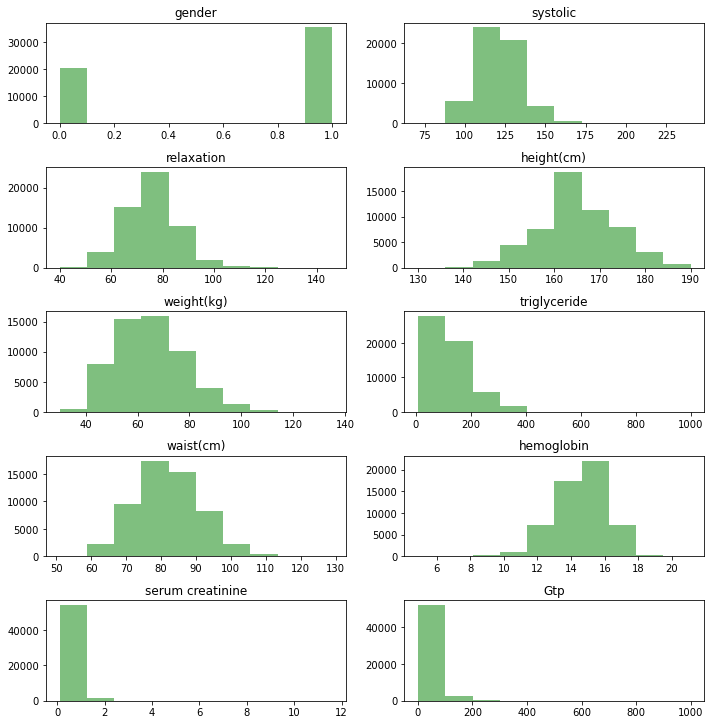

In [439]:
# num_list = list(df.columns)
num_list = ['gender','systolic', 'relaxation', 'height(cm)', 'weight(kg)',
       'triglyceride', 'waist(cm)', 'hemoglobin', 'serum creatinine', 'Gtp']
fig = plt.figure(figsize=(10,30))

for i in range(len(num_list)):
    plt.subplot(15,2,i+1)
    plt.title(num_list[i])
    plt.hist(df[num_list[i]],color='green',alpha=0.5)

plt.tight_layout()

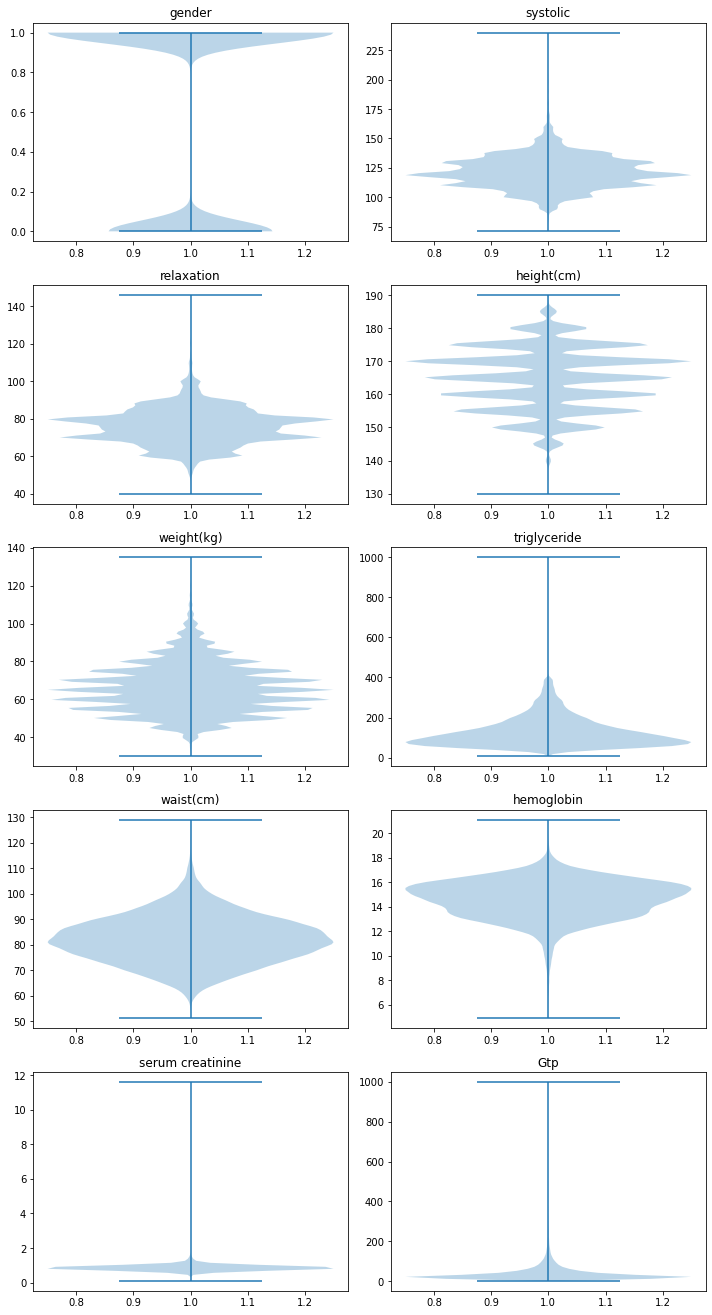

In [440]:
num_list4=['gender','systolic', 'relaxation', 'height(cm)', 'weight(kg)',
       'triglyceride', 'waist(cm)', 'hemoglobin', 'serum creatinine', 'Gtp']
fig = plt.figure(figsize=(10,40))

for i in range(len(num_list4)):
    plt.subplot(11,2,i+1)
    plt.title(num_list4[i])
    plt.violinplot(df[num_list4[i]])

plt.tight_layout()

In [441]:
# sns.pairplot(df.iloc[:,1:27], hue='smoking')
#sns.pairplot(df,hue='smoking',vars=['gender', 'systolic', 'relaxation', 'height(cm)', 'weight(kg)', 'waist(cm)',
#       'triglyceride', 'hemoglobin', 'serum creatinine', 'Gtp'])

In [442]:
# Get the correlation of the columns
df.corr()

,gender,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,triglyceride,hemoglobin,serum creatinine,ALT,Gtp,dental caries,tartar,smoking
gender,1.000000,0.741556,0.574956,0.419568,0.167289,0.177891,0.098117,0.241520,0.702214,0.507249,0.167903,0.237270,0.084408,0.055473,0.510340
height(cm),0.741556,1.000000,0.675656,0.378902,0.080585,0.113193,0.019619,0.156693,0.539367,0.383883,0.126511,0.139720,0.079331,0.055513,0.396675
weight(kg),0.574956,0.675656,1.000000,0.822842,0.266131,0.271634,0.136237,0.324429,0.492970,0.324808,0.250634,0.209625,0.073536,0.059921,0.302780
waist(cm),0.419568,0.378902,0.822842,1.000000,0.316922,0.292627,0.211132,0.361922,0.387066,0.235024,0.252478,0.243141,0.044203,0.046197,0.226259
systolic,0.167289,0.080585,0.266131,0.316922,1.000000,0.761051,0.172700,0.198826,0.186514,0.072288,0.094893,0.165724,0.029894,0.006542,0.073109
relaxation,0.177891,0.113193,0.271634,0.292627,0.761051,1.000000,0.147879,0.215541,0.232899,0.085033,0.106648,0.177648,0.031634,0.021659,0.108309
fasting blood sugar,0.098117,0.019619,0.136237,0.211132,0.172700,0.147879,1.000000,0.227746,0.099921,0.041341,0.087616,0.182414,0.001231,0.010902,0.100279
triglyceride,0.241520,0.156693,0.324429,0.361922,0.198826,0.215541,0.227746,1.000000,0.273353,0.124986,0.175164,0.301876,0.028310,0.042277,0.251799
hemoglobin,0.702214,0.539367,0.492970,0.387066,0.186514,0.232899,0.099921,0.273353,1.000000,0.371382,0.202025,0.223844,0.067984,0.053990,0.400678
serum creatinine,0.507249,0.383883,0.324808,0.235024,0.072288,0.085033,0.041341,0.124986,0.371382,1.000000,0.083602,0.102411,0.027454,0.028576,0.216812


<AxesSubplot:>

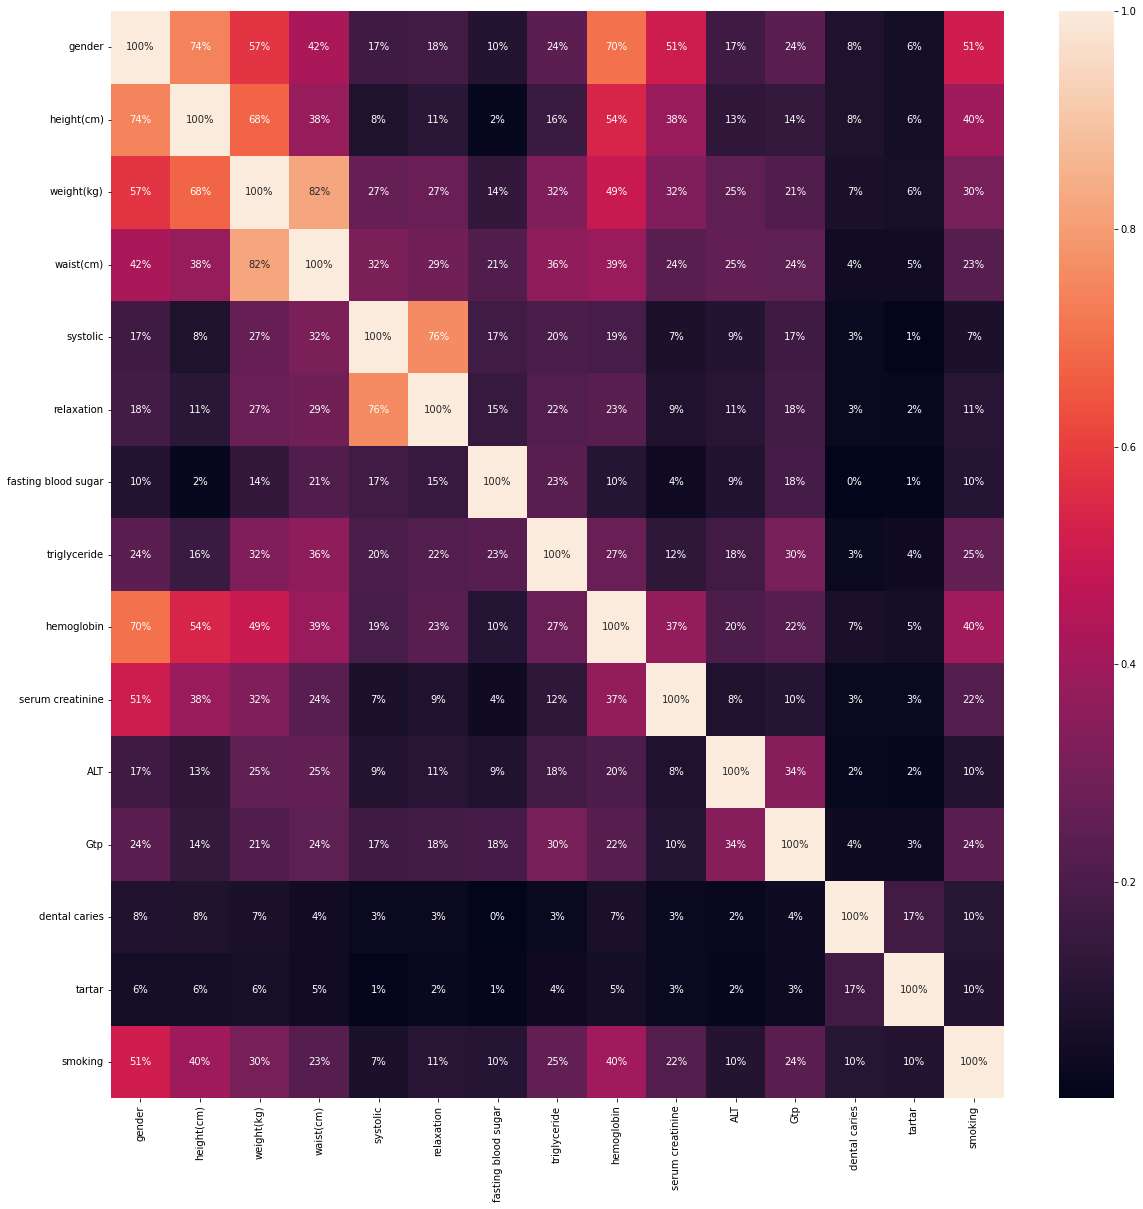

In [443]:
# Visualization the correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [444]:
df.describe()

,gender,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,triglyceride,hemoglobin,serum creatinine,ALT,Gtp,dental caries,tartar,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,0.635657,164.649321,65.864936,82.046418,121.494218,76.004830,99.312325,126.665697,14.622592,0.885738,27.036037,39.952201,0.213334,0.555556,0.367288
std,0.481250,9.194597,12.820306,9.274223,13.675989,9.679278,20.795591,71.639817,1.564498,0.221524,30.947853,50.290539,0.409665,0.496908,0.482070
min,0.000000,130.000000,30.000000,51.000000,71.000000,40.000000,46.000000,8.000000,4.900000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,160.000000,55.000000,76.000000,112.000000,70.000000,89.000000,74.000000,13.600000,0.800000,15.000000,17.000000,0.000000,0.000000,0.000000
50%,1.000000,165.000000,65.000000,82.000000,120.000000,76.000000,96.000000,108.000000,14.800000,0.900000,21.000000,25.000000,0.000000,1.000000,0.000000
75%,1.000000,170.000000,75.000000,88.000000,130.000000,82.000000,104.000000,160.000000,15.800000,1.000000,31.000000,43.000000,0.000000,1.000000,1.000000
max,1.000000,190.000000,135.000000,129.000000,240.000000,146.000000,505.000000,999.000000,21.100000,11.600000,2914.000000,999.000000,1.000000,1.000000,1.000000


In [445]:
df['smoking'].value_counts()

0    35237
1    20455
Name: smoking, dtype: int64

In [446]:
# df.groupby('smoking').mean()

df1=df.groupby('smoking').mean().T
df1['gap'] = df1.apply(lambda x: (x[1] - x[0])/x[1]*100, axis = 1)
df1.sort_values(by="gap",ascending=False)

smoking,0,1,gap
gender,0.448534,0.958005,53.180408
Gtp,30.885859,55.570423,44.420328
dental caries,0.180918,0.269176,32.788353
triglyceride,112.921957,150.341481,24.889687
ALT,24.740897,30.989782,20.164340
tartar,0.518205,0.619897,16.404658
weight(kg),62.907455,70.959668,11.347590
serum creatinine,0.849144,0.948775,10.501010
hemoglobin,14.144990,15.445339,8.419038
waist(cm),80.447669,84.800518,5.133046


C:\Users\Asif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gender')

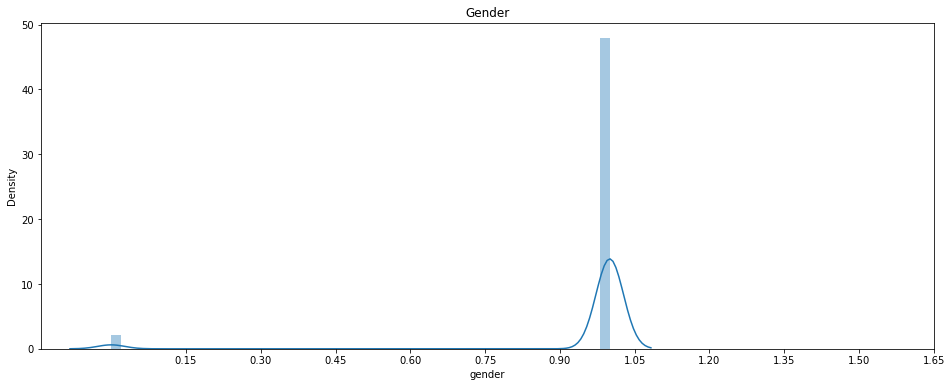

In [447]:
#Gender for smoking
fig = plt.figure(figsize = (16,6))

sns.distplot(df["gender"][df["smoking"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("Gender")

C:\Users\Asif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Hemoglobin')

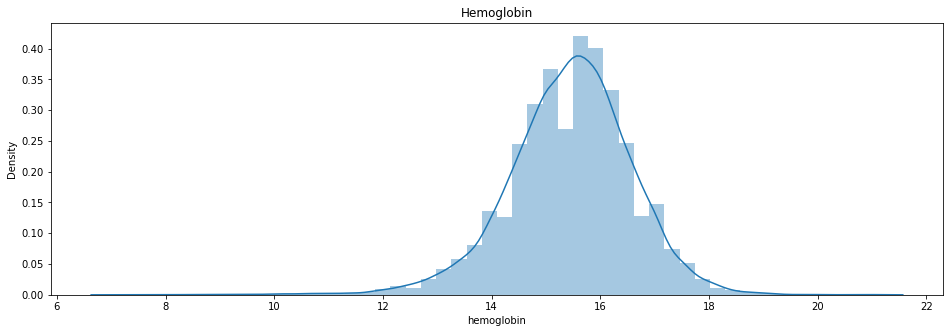

In [448]:
#Hemoglobin for smoking
fig = plt.figure(figsize = (16,5))

sns.distplot(df["hemoglobin"][df["smoking"] == 1])
plt.xticks()
plt.title("Hemoglobin")

C:\Users\Asif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'height(cm)')

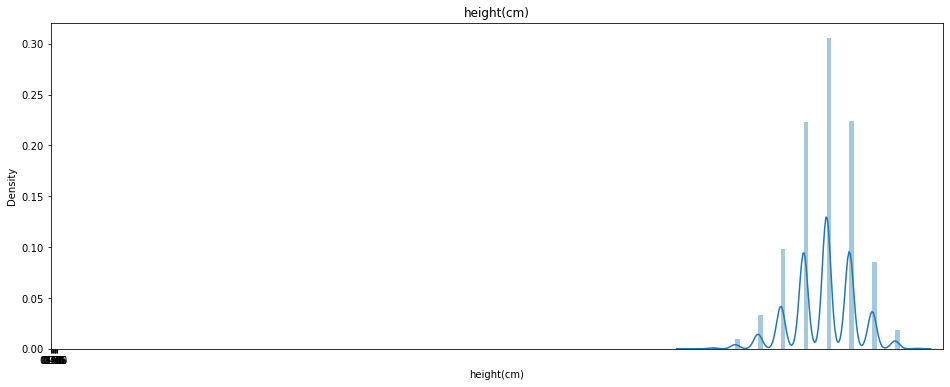

In [449]:
#Hemoglobin for smoking
fig = plt.figure(figsize = (16,6))

sns.distplot(df["height(cm)"][df["smoking"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("height(cm)")

C:\Users\Asif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gtp')

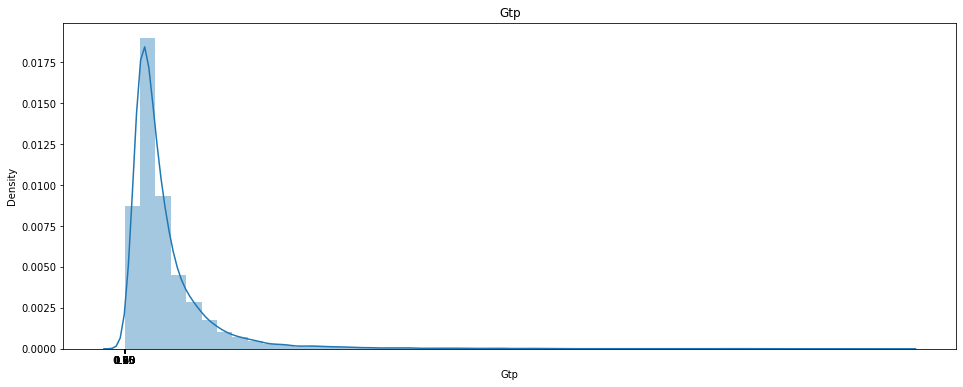

In [450]:
#Gtp for smoking
fig = plt.figure(figsize = (16,6))

sns.distplot(df["Gtp"][df["smoking"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("Gtp")

In [451]:
# split the data set into independent (X) and dependent (Y) data set
X = df.drop(["waist(cm)","systolic","relaxation","fasting blood sugar","serum creatinine","ALT","dental caries","tartar","smoking"], axis =1)
Y = df.iloc[:,-1]

In [452]:
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [453]:
# Scale the data (Feature Scaling)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.fit_transform(X_test)
# print(X_train)

In [454]:
# Crfeate a function for the models
def models (X_train, Y_train):

    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    # Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators =10, criterion = 'entropy', random_state=0)
    forest.fit(X_train, Y_train)
    
    # Print the models accuracy on the training data
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]Decision Tree Training Accuracy:', tree.score(X_train, Y_train))
    print('[2]Random Forest Training Accuracy:', forest.score(X_train, Y_train))
    
    return log, tree, forest

In [455]:
# Getting all of the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.7322963661257379
[1]Decision Tree Training Accuracy: 0.9995286512692748
[2]Random Forest Training Accuracy: 0.9888223015285166


In [456]:
#  test model accuracy on test on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range( len(model)):
    print('Model ', i)
    cm = confusion_matrix(Y_test,model[i].predict(X_test))

    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    print(cm)
    print('Testing Accuracy = ', (TP + TN)/(TP+TN+FN+FP))
    print()

Model  0
[[5372 1704]
 [1221 2842]]
Testing Accuracy =  0.7374091031510908

Model  1
[[5722 1354]
 [1346 2717]]
Testing Accuracy =  0.7576084029086991

Model  2
[[6073 1003]
 [1365 2698]]
Testing Accuracy =  0.7874135918843702



In [457]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range( len(model)):
    print('Model ', i)
    print (classification_report(Y_test,model[i].predict(X_test)))
    svc = accuracy_score(Y_test,model[i].predict(X_test)) 
    print(svc)


Model  0
              precision    recall  f1-score   support

           0       0.81      0.76      0.79      7076
           1       0.63      0.70      0.66      4063

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.75      0.74      0.74     11139

0.7374091031510908
Model  1
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7076
           1       0.67      0.67      0.67      4063

    accuracy                           0.76     11139
   macro avg       0.74      0.74      0.74     11139
weighted avg       0.76      0.76      0.76     11139

0.7576084029086991
Model  2
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      7076
           1       0.73      0.66      0.70      4063

    accuracy                           0.79     11139
   macro avg       0.77      0.76      0.77     11139
weighted 

In [458]:

from sklearn.ensemble import RandomForestClassifier
svc = RandomForestClassifier(n_estimators =10, criterion = 'entropy', random_state=0)
svc.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [459]:
svc_y_pred = svc.predict(X_test)
svc_cm = confusion_matrix(Y_test,svc_y_pred)
print(svc_cm)

[[6073 1003]
 [1365 2698]]


In [460]:
import pickle
pickle.dump(svc, open('classifier.pkl', 'wb'))

In [461]:
pickle.dump(sc, open('sc.pkl', 'wb'))